# 機械学習の色々
- ここでは、よく使われる機械学習のアルゴリズムを一気に体験することとする

## 対象データ
- Irisデータ(アヤメの花の分類)のデータセットを対象とする。
- https://en.wikipedia.org/wiki/Iris_flower_data_set
  - sepal.length：がくの長さ
  - sepal.width：がくの幅
  - petal.length：花弁の長さ
  - petal.width：花弁の幅
  - variety:アヤメの種類
    - Setosa
    - Versicolor
    - Virginica

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HumanAI/Lec02/iris.csv')

In [5]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [8]:
df.shape

(150, 5)

## 欠損値の確認


In [6]:
df.isnull().all()

sepal.length    False
sepal.width     False
petal.length    False
petal.width     False
variety         False
dtype: bool

- 欠損値はないようである。

## データの性質確認

In [7]:
df['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [10]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

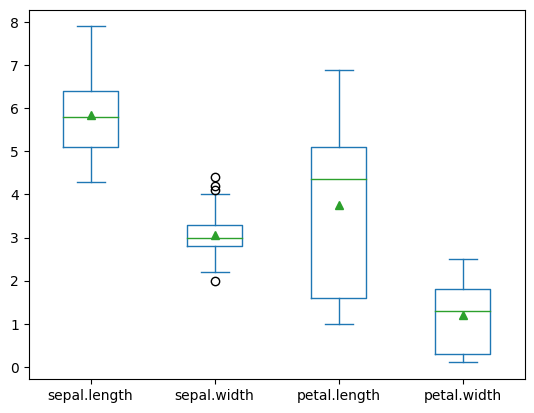

In [12]:
df.plot.box(showmeans=True) # 箱ひげ図表示

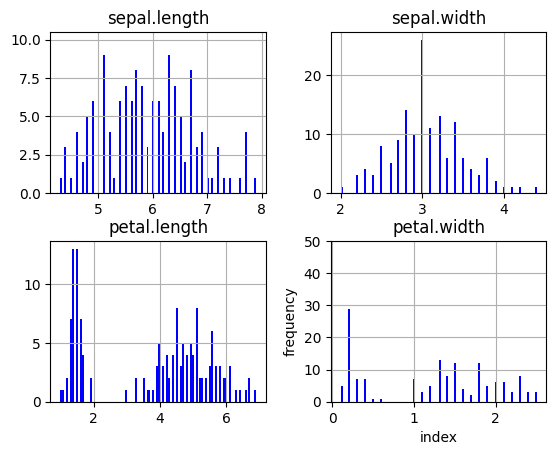

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df.hist(bins=100, color = "blue", grid =True, label = 'pandas') # ヒストグラム導出
plt.ylim(0,50)
plt.ylabel('frequency')
plt.xlabel('index')
plt.show()
plt.close()

In [21]:
df.corr() # 各変数の相関を出す

<ipython-input-21-0c93a9b79f0b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # 各変数の相関を出す


,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


<ipython-input-23-664db3cc5517>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='summer')


<Axes: >

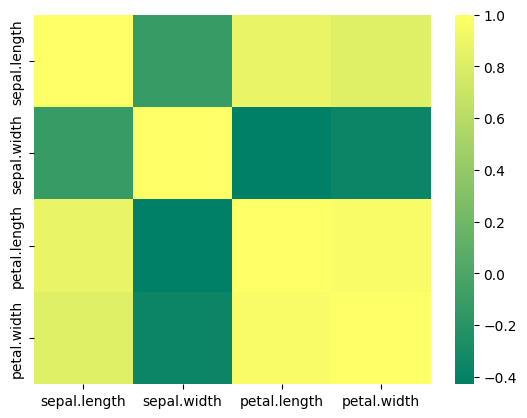

In [23]:
import seaborn as sns
sns.heatmap(df.corr(), cmap='summer')

## ラベルエンコーディング
- varietyが文字列であるため、扱いづらいため、Setosaを0、Versicolorを1、Virginicaを2という具合で表す方法で数値化する。これをラベルエンコーディングと呼ぶ。
-
- 文字列データ(カテゴリ変数)の場合、エンコーディングという処理を行うことが多い。
  - ワンホットエンコーディング
    - Setosaを001、Versicolorを010、Virginicaを100
  - ラベルエンコーディング
    - Setosaを0、Versicolorを1、Virginicaを2
  - カウントエンコーディング
    - それぞれの数が異なる場合、合計数をそのまま値とする
  - ターゲットエンコーディング
    - 目的変数の情報を説明変数に使用して値とする

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['variety'].values)
df['label']=label
df

,sepal.length,sepal.width,petal.length,petal.width,variety,label
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


In [25]:
iris_data=df.loc[:, ['sepal.length','sepal.width', 'petal.length', 'petal.width']].values
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [26]:
iris_label=df['label'].values
iris_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 分類とクラスタリングの違い(教師あり/教師なし学習)
- 分類：訓練データに基づいてデータを分ける
  - iris_dataとiris_labelを用いて、事前に学習をして、未知のiris_labelを予測する
- クラスタリング：データの類似度でデータを分ける
  - iris_dataのみを用いて、データを分ける

# 分類(教師あり学習)


## 訓練用データとテストデータを分割する
- 分類のアルゴリズムを実行するとき、訓練用データとテストデータを分割し、訓練用データで学習を行い、それを用いてテストデータがうまく分類されるか確認をすることを行う。
- そのために、事前に正解ラベルを持つデータについて、訓練用データとテストデータに分割をする。

In [27]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(iris_data, iris_label, test_size=0.25)

In [28]:
X_train.shape

(112, 4)

In [29]:
y_train.shape

(112,)

In [30]:
X_test.shape

(38, 4)

In [31]:
y_test.shape

(38,)

## サポートベクトルマシン(Support Vector Machine)
- マージン最大化という考え方で分類を実現するアルゴリズム
  - 決定境界と学習データとの間のマージンを大きくすることで、より妥当な境界を得ようとする。

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model=SVC()

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

0.9736842105263158

In [33]:
import numpy as np
X_new=np.array([[5.3 ,2.4 ,  3.5, 1.2]])

In [34]:
model.predict(X_new)

array([1])

## ナイーブベイズ
- データがあるラベルである確率を計算し、確率が最大になるラベルを分類する方法
- スパムメールのフィルタリングへの応用で有名

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model=GaussianNB()

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

0.9473684210526315

In [36]:
import numpy as np
X_new=np.array([[4.3 , 1.4 , 2.5, 0.2]])

In [37]:
model.predict(X_new)

array([0])

## 決定木(Decision Tree)
- 木構造の分割を実現することにより分類するアルゴリズム
- 根から葉に再起的に分割
  - 適当に一つの特徴を選び根とする。特徴ごとに枝をつくる。
  - 訓練データを部分集合に分割(一つの枝につき一つの部分集合)。
  - 同じ手順を各枝について最適的に行う。
  - 割り当てられた訓練データが同じクラスになったら終了。


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model=DecisionTreeClassifier()

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

0.9473684210526315

In [39]:
import numpy as np
X_new=np.array([[5.3 , 5.4 , 6.5, 5.2]])

In [40]:
model.predict(X_new)

array([2])

In [41]:
!sudo apt install graphviz
!pip install dtreeviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.1 MB/s eta 0:00:00


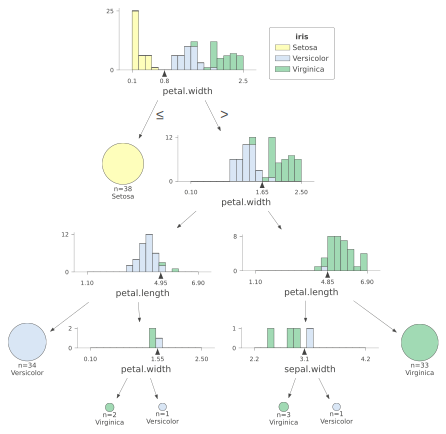

In [51]:
import dtreeviz
from IPython.core.display import display, HTML

feature_names=[str(i) for i in df.columns[0:4].values]
class_name=[str(i) for i in df['variety'].value_counts().index]

viz_model = dtreeviz.model(model,
                           X_train=X_train, y_train=y_train,
                           feature_names=feature_names,
                           target_name='iris',
                           class_names=class_name)
viz_model.view()

##アンサンブル学習
- 多数の分類器を使って判定し、その結果をまとめることによって、一つの分類器を使うよりも良い結果が得られることが多い-->アンサンブル学習
  - バギング(ブートストラップ・アグリゲーション)
  - ブースティング
  - スタッキング



### バギング(ブートストラップ・アグリゲーション)
- 訓練データから無作為に別々のサブセットをサンプリングしてそれぞれ訓練し複数の分類器をつくり平均や投票で集計して結果を出す


In [52]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model=BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True)

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

0.9473684210526315

In [53]:
import numpy as np
X_new=np.array([[5.3 , 2.4 , 3.5, 1.2]])

In [54]:
model.predict(X_new)

array([1])

### ランダムフォレスト
- 決定木を複数利用することにより、決定木単体よりも予測精度の向上を図る手法
- ランダムフォレストは前記のブートストラップにより多様なデータセットを作ると同時に一部の特徴量だけランダムに選択することにより、複数の決定木の多様性を担保している
- 予測結果の多数決をとることにより、分類結果の結果を返す。

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model=RandomForestClassifier()

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

0.9473684210526315

In [56]:
import numpy as np
X_new=np.array([[5.3 , 2.4 , 3.5, 1.2]])

In [57]:
model.predict(X_new)

array([1])

- ランダムフォレストの優れた点は、各特徴量の相対的な重要度を知ることができる

In [ ]:
model.feature_importances_

array([0.11365935, 0.03790173, 0.45247564, 0.39596328])

In [ ]:
for name, score in zip(df.columns[0:4].values, model.feature_importances_):
  print(name, score)

sepal.length 0.1136593494009459
sepal.width 0.03790173141888919
petal.length 0.45247563719361766
petal.width 0.3959632819865474


### アダブースト
- ベースの決定木などの分類器を訓練し、訓練セットを対象として予測のために使い、分類に失敗したものについて相対的な重みをあげて、第2の分類器を訓練し、それを繰り返す


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


model=AdaBoostClassifier(DecisionTreeClassifier(max_depth=None))

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)


0.9736842105263158

In [ ]:
import numpy as np
X_new=np.array([[5.3 , 2.4 , 3.5, 1.2]])

In [ ]:
model.predict(X_new)

array([1])

### 勾配ブースティング
- ベースの決定木などの分類器を訓練し、訓練セットを対象として予測のために使い、新予測値を前の予測値との残差に適用させようとし、それを繰り返す手法。


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

model=GradientBoostingClassifier()

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

0.9736842105263158

In [ ]:
import numpy as np
X_new=np.array([[5.3 , 2.4 , 3.5, 1.2]])

In [ ]:
model.predict(X_new)

array([1])

### XGBoost
- eXtreme Gradient Boosting
  - https://arxiv.org/abs/1603.02754
    - Tianqi Chen, Carlos Guestrin(University of Washington)がKDD'16 で発表した論文が最初
- 勾配ブースティング系の手法の一つ
- https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tweedie-regression-objective-reg-tweedie

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier()

# fitで学習
model.fit(X_train, y_train)

# predictで予測
y_pred = model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

0.9736842105263158

In [ ]:
import numpy as np
X_new=np.array([[5.3 , 2.4 , 3.5, 1.2]])

In [ ]:
model.predict(X_new)

array([1])

### LightGBM
- Light Gradient Boosting Machine
  - https://proceedings.neurips.cc/paper/2017/file/6449f44a102fde848669bdd9eb6b76fa-Paper.pdf
    - MicrosoftがNIPS 2017で発表した論文が最初
- 勾配ブースティング系の手法の一つ

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

model = lgb.LGBMClassifier()

# fitで学習
model.fit(X_train, y_train)

# predictで予測
y_pred = model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

0.9736842105263158

In [ ]:
import numpy as np
X_new=np.array([[5.3 , 2.4 , 3.5, 1.2]])

In [ ]:
model.predict(X_new)

array([1])

## kNN(k近傍法)
- 入力データと学習データの距離を計算し、近い方からk個取得し、学習データラベルで多数決を行い、分類結果とするアルゴリズム.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model=KNeighborsClassifier()

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

1.0

In [ ]:
import numpy as np
X_new=np.array([[5.3 , 2.4 , 3.5, 1.2]])

In [ ]:
model.predict(X_new)

array([1])

## ニューラルネットワーク
- 入力層、中間層、出力層で構成されるアルゴリズム。


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

model=MLPClassifier()

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9473684210526315

- 「最大反復回数（200回）に達し、最適化がまだ収束していません。」と出る。
- ハイパーパラメタを調整して、収束するまで学習するように設定する。
  - mode.get_params()で設定できるハイパーパラメタの種類とその現状設定されている状況を見ることができる
    - それらのバイパーパラメタの詳細な説明はそのパッケージのWebページを確認しよう
      - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
- 'max_iter': 200-->1000にしよう



In [ ]:
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

model=MLPClassifier(max_iter=10000)

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

1.0

#### 良いハイパーパラメタの値を選ぶための方法→グリッドサーチ
- 1分ほどかかります
- 調整したいハイパーパラメタを総当たりで精度を検討する

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np

results = []
for hidden_layer_sizes in [10, 100, 1000]:
  for solver in ['sgd', 'adam', 'lbfgs']:
    for activation in ['identity', 'logistic', 'tanh', 'relu']:
      model = MLPClassifier(max_iter=10000,
                            hidden_layer_sizes=(hidden_layer_sizes,),
                            activation=activation,
                            solver=solver)
      model.fit(X_train, y_train)
      score = model.score(X_train, y_train)
      y_pred = model.predict(X_test)
      accuracy=accuracy_score(y_pred, y_test)
      results=np.append(results, [hidden_layer_sizes, activation, solver, score, accuracy]).reshape(-1, 5)

df_ac = pd.DataFrame(data=results, columns=['hidden_layer_sizes', 'activation', 'solver', 'score', 'accuracy'])
pd.set_option('display.max_rows', 100)
df_ac

,hidden_layer_sizes,activation,solver,score,accuracy
0,10,identity,sgd,0.9642857142857143,0.9736842105263158
1,10,logistic,sgd,0.8482142857142857,0.8421052631578947
2,10,tanh,sgd,0.9732142857142857,0.9736842105263158
3,10,relu,sgd,0.9732142857142857,0.9473684210526315
4,10,identity,adam,0.9732142857142857,1.0
5,10,logistic,adam,0.9732142857142857,1.0
6,10,tanh,adam,0.9821428571428571,0.9736842105263158
7,10,relu,adam,0.9821428571428571,0.9736842105263158
8,10,identity,lbfgs,0.9821428571428571,1.0
9,10,logistic,lbfgs,1.0,0.9736842105263158


# 次元削減
- たくさんの変数を持つデータを特徴を保ちながら、少数の変数で表現する。
- Irisデータの場合
  - sepal.length(がくの長さ)、sepal.width(がくの幅)、petal.length（花弁の長さ）、petal.width（花弁の幅）の4変数で表現しているが、それを新たな2変数を作って定義をする。

In [ ]:
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## PCA(主成分分析)
- データから主成分(方向と重要度からなる)を見つけて、主成分を新たな変数としてデータを表現する手法

In [ ]:
from sklearn.decomposition import PCA

#n_components=3

model=PCA(n_components=3)

# 主成分を抽出
model=model.fit(iris_data)

# 主成分にデータを変換
iris_dec_data=model.transform(iris_data)

In [ ]:
model.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 3,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [ ]:
iris_dec_data

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

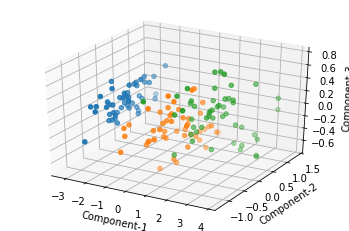

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

X0 = iris_dec_data[iris_label==0]
X1 = iris_dec_data[iris_label==1]
X2 = iris_dec_data[iris_label==2]
ax.scatter(X0[:, 0], X0[:, 1], X0[:, 2])
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2])
ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2])

ax.set_xlabel("Component-1")
ax.set_ylabel("Component-2")
ax.set_zlabel("Component-3")

plt.show()

In [ ]:
import plotly
import plotly.express

fig=plotly.express.scatter_3d(x=iris_dec_data[:,0], y=iris_dec_data[:,1], z=iris_dec_data[:,2], color=iris_label,)
fig.update_traces(marker=dict(size=4))
fig.show()

In [ ]:
from sklearn.decomposition import PCA

#n_components=2

model=PCA(n_components=2)

# 主成分を抽出
model=model.fit(iris_data)

# 主成分にデータを変換
iris_dec_data=model.transform(iris_data)

In [ ]:
iris_dec_data

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

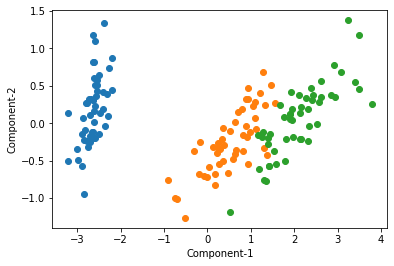

In [ ]:
import matplotlib.pyplot as plt
ig, ax = plt.subplots()

X0 = iris_dec_data[iris_label==0]
X1 = iris_dec_data[iris_label==1]
X2 = iris_dec_data[iris_label==2]
ax.scatter(X0[:, 0], X0[:, 1])
ax.scatter(X1[:, 0], X1[:, 1])
ax.scatter(X2[:, 0], X2[:, 1])

ax.set_xlabel("Component-1")
ax.set_ylabel("Component-2")


plt.show()

In [ ]:
import plotly
import plotly.express

fig=plotly.express.scatter(x=iris_dec_data[:,0], y=iris_dec_data[:,1], color=iris_label)
fig.update_traces(marker=dict(size=10))
fig.show()

# クラスタリング(教師なし学習)

- データは、sepal.length(がくの長さ)、sepal.width(がくの幅)、petal.length（花弁の長さ）、petal.width（花弁の幅）の4変数を使い、それぞれのデータを3つにクラスタとして分割する問題を解いてみよう。

In [ ]:
X=iris_data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## k-means法
- 次のようなアルゴリズムでクラスタとしてまとめる
  - (1)データの中か適当な点をクラスタ数(k)だけ選び、それを初期の重心とする
  - (2)各データと重心を計算し、もっとも近い重心をそのデータの所属するクラスタとする
  - (3)クラスタごとにデータ点の平均を計算し、それを新しい重心とする
  - (4)(2),(3)を繰り返して、データが所属するクラスタが変化しなくなるか計算ステップ上限に達するまで計算をする。

In [ ]:
from sklearn.cluster import KMeans

model= KMeans(n_clusters=3)

# fitで学習
model.fit(X)

KMeans(n_clusters=3)

In [ ]:
labels=model.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
cluster_centers=model.cluster_centers_
cluster_centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

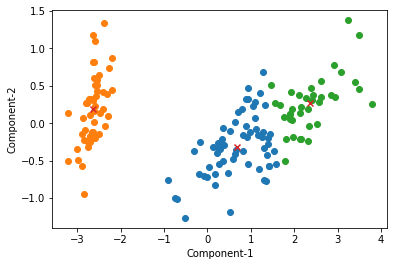

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

n_components=2

model=PCA(n_components=n_components)

# 主成分を抽出
model=model.fit(X)

# 主成分にデータを変換
X_trans=model.transform(X)

# 主成分にクラスタ中心を変換
cluster_centers_trans=model.transform(cluster_centers)


ig, ax = plt.subplots()

X0 = X_trans[labels==0]
X1 = X_trans[labels==1]
X2 = X_trans[labels==2]
ax.scatter(X0[:, 0], X0[:, 1])
ax.scatter(X1[:, 0], X1[:, 1])
ax.scatter(X2[:, 0], X2[:, 1])
ax.scatter(cluster_centers_trans[:,0],cluster_centers_trans[:,1], marker='x')

ax.set_xlabel("Component-1")
ax.set_ylabel("Component-2")

plt.show()